4장 - pymc2


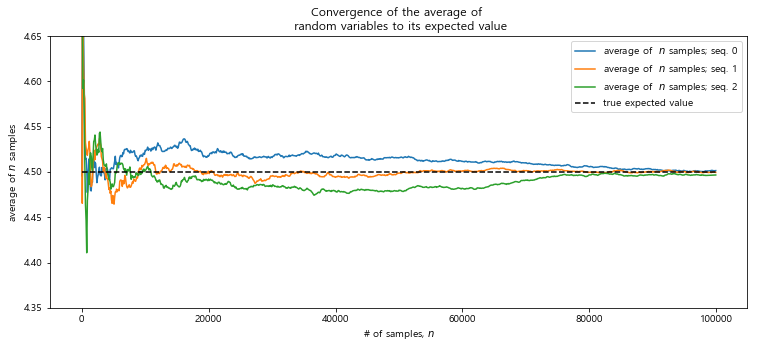

In [1]:
%matplotlib inline
import numpy as np
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('font', family='Malgun Gothic')  # 그림 한글 폰트 지정, 맑은 고딕
figsize(12.5, 5)
import pymc as pm

sample_size = 100000
expected_value = lambda_ = 4.5
poi = pm.rpoisson
N_samples = range(1, sample_size, 100)

for k in range(3):

    samples = poi(lambda_, size=sample_size)

    partial_average = [samples[:i].mean() for i in N_samples]

    plt.plot(N_samples, partial_average, lw=1.5, label="average \
of  $n$ samples; seq. %d" % k)


plt.plot(N_samples, expected_value * np.ones_like(partial_average),
         ls="--", label="true expected value", c="k")

plt.ylim(4.35, 4.65)
plt.title("Convergence of the average of \n random variables to its \
expected value")
plt.ylabel("average of $n$ samples")
plt.xlabel("# of samples, $n$")
plt.legend();

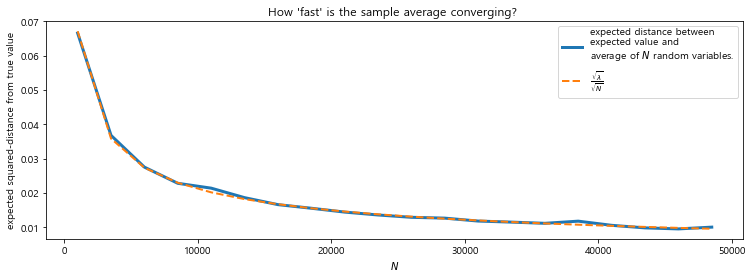

In [2]:
figsize(12.5, 4)

N_Y = 250  # use this many to approximate D(N)
N_array = np.arange(1000, 50000, 2500)  # use this many samples in the approx. to the variance.
D_N_results = np.zeros(len(N_array))

lambda_ = 4.5
expected_value = lambda_  # for X ~ Poi(lambda) , E[ X ] = lambda


def D_N(n):
    """
    This function approx. D_n, the average variance of using n samples.
    """
    Z = poi(lambda_, size=(n, N_Y))
    average_Z = Z.mean(axis=0)
    return np.sqrt(((average_Z - expected_value) ** 2).mean())


for i, n in enumerate(N_array):
    D_N_results[i] = D_N(n)


plt.xlabel("$N$")
plt.ylabel("expected squared-distance from true value")
plt.plot(N_array, D_N_results, lw=3,
         label="expected distance between\n\
expected value and \naverage of $N$ random variables.")
plt.plot(N_array, np.sqrt(expected_value) / np.sqrt(N_array), lw=2, ls="--",
         label=r"$\frac{\sqrt{\lambda}}{\sqrt{N}}$")
plt.legend()
plt.title("How 'fast' is the sample average converging? ");

In [3]:
import pymc as pm
N = 10000
print(np.mean([pm.rexponential(0.5) > 10 for i in range(N)]))

0.006


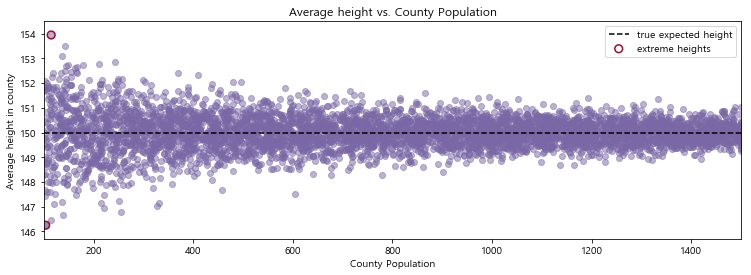

In [4]:
figsize(12.5, 4)
std_height = 15
mean_height = 150

n_counties = 5000
pop_generator = pm.rdiscrete_uniform
norm = pm.rnormal

# generate some artificial population numbers
population = pop_generator(100, 1500, size=n_counties)

average_across_county = np.zeros(n_counties)
for i in range(n_counties):
    # generate some individuals and take the mean
    average_across_county[i] = norm(mean_height, 1. / std_height ** 2,
                                    size=population[i]).mean()

# located the counties with the apparently most extreme average heights.
i_min = np.argmin(average_across_county)
i_max = np.argmax(average_across_county)

# plot population size vs. recorded average
plt.scatter(population, average_across_county, alpha=0.5, c="#7A68A6")
plt.scatter([population[i_min], population[i_max]],
            [average_across_county[i_min], average_across_county[i_max]],
            s=60, marker="o", facecolors="none",
            edgecolors="#A60628", linewidths=1.5,
            label="extreme heights")

plt.xlim(100, 1500)
plt.title("Average height vs. County Population")
plt.xlabel("County Population")
plt.ylabel("Average height in county")
plt.plot([100, 1500], [150, 150], color="k", label="true expected \
height", ls="--")
plt.legend(scatterpoints=1);

In [5]:
print("Population sizes of 10 'shortest' counties: ")
print(population[np.argsort(average_across_county)[:10]])
print("\nPopulation sizes of 10 'tallest' counties: ")
print(population[np.argsort(-average_across_county)[:10]])

Population sizes of 10 'shortest' counties: 
[104 105 115 139 255 222 327 121 215 331]

Population sizes of 10 'tallest' counties: 
[115 143 136 243 211 148 179 145 167 162]


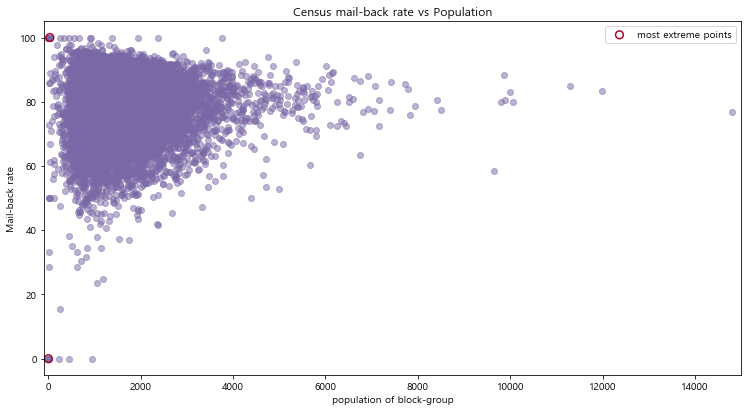

In [6]:
figsize(12.5, 6.5)
data = np.genfromtxt(r"C:\Users\wh\006775\Probabilistic-Programming-and-Bayesian-Methods-for-Hackers-master\Chapter4_TheGreatestTheoremNeverTold\data\census_data.csv", skip_header=1,
                     delimiter=",")
plt.scatter(data[:, 1], data[:, 0], alpha=0.5, c="#7A68A6")
plt.title("Census mail-back rate vs Population")
plt.ylabel("Mail-back rate")
plt.xlabel("population of block-group")
plt.xlim(-100, 15e3)
plt.ylim(-5, 105)

i_min = np.argmin(data[:, 0])
i_max = np.argmax(data[:, 0])

plt.scatter([data[i_min, 1], data[i_max, 1]],
            [data[i_min, 0], data[i_max, 0]],
            s=60, marker="o", facecolors="none",
            edgecolors="#A60628", linewidths=1.5,
            label="most extreme points")

plt.legend(scatterpoints=1);

In [7]:
from IPython.core.display import Image
%run top_pic_comments.py 2

Title of submission: 
 I took 5 pictures with my drone and stitched them together to create this inception style picture.
https://i.imgur.com/O2vfxdf.jpg


In [8]:
n_comments = len(contents)
comments = np.random.randint( n_comments, size=4)
print("Some Submissions (out of %d total) \n-----------"%n_comments)
for i in comments:
    print('"' + contents[i] + '"')
    print("upvotes/downvotes: ",votes[i,:])
    print('\n')

Some Submissions (out of 134 total) 
-----------
"It resembles the interior of a Stanford Torus more than an Inception-style picture."
upvotes/downvotes:  [2 0]


"Damn that's cool. So creative."
upvotes/downvotes:  [2 0]


"Great job OP. I just created r/curvedlandscapes because it would be fun to curate them. Want to be a mod?"
upvotes/downvotes:  [63  0]


"The road makes it look like you're on a fucking halo."
upvotes/downvotes:  [3 0]




In [9]:
import pymc as pm


def posterior_upvote_ratio(upvotes, downvotes, samples=20000):
    """
    This function accepts the number of upvotes and downvotes a particular submission received, 
    and the number of posterior samples to return to the user. Assumes a uniform prior.
    """
    N = upvotes + downvotes
    upvote_ratio = pm.Uniform("upvote_ratio", 0, 1)
    observations = pm.Binomial("obs", N, upvote_ratio, value=upvotes, observed=True)
    # do the fitting; first do a MAP as it is cheap and useful.
    map_ = pm.MAP([upvote_ratio, observations]).fit()
    mcmc = pm.MCMC([upvote_ratio, observations])
    mcmc.sample(samples, samples / 4)
    return mcmc.trace("upvote_ratio")[:]

 [-----------------100%-----------------] 20000 of 20000 complete in 0.7 sec

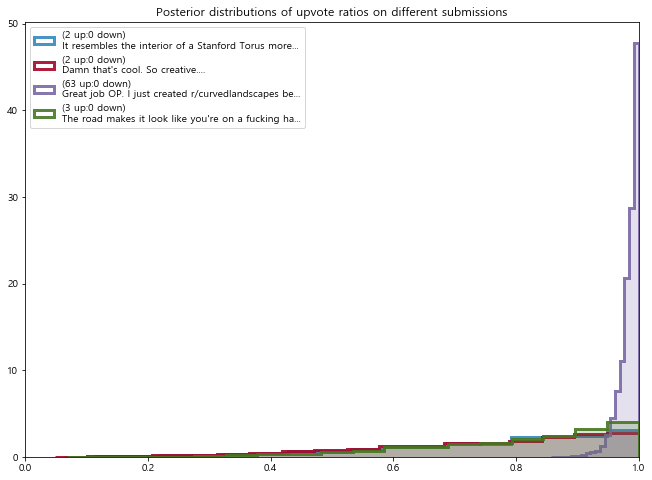

In [10]:
figsize(11., 8)
posteriors = []
colours = ["#348ABD", "#A60628", "#7A68A6", "#467821", "#CF4457"]
for i in range(len(comments)):
    j = comments[i]
    posteriors.append(posterior_upvote_ratio(votes[j, 0], votes[j, 1]))
    plt.hist(posteriors[i], bins=18, normed=True, alpha=.9,
             histtype="step", color=colours[i % 5], lw=3,
             label='(%d up:%d down)\n%s...' % (votes[j, 0], votes[j, 1], contents[j][:50]))
    plt.hist(posteriors[i], bins=18, normed=True, alpha=.2,
             histtype="stepfilled", color=colours[i], lw=3, )

plt.legend(loc="upper left")
plt.xlim(0, 1)
plt.title("Posterior distributions of upvote ratios on different submissions");

[2 3 0 1] [0.3782382185894978, 0.36921619847946485, 0.95325690810877739, 0.47587248031732948]


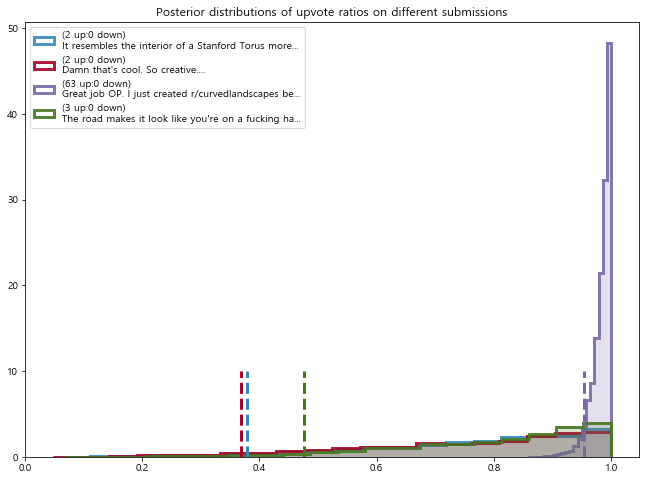

In [11]:
N = posteriors[0].shape[0]
lower_limits = []

for i in range(len(comments)):
    j = comments[i]
    plt.hist(posteriors[i], bins=20, normed=True, alpha=.9,
             histtype="step", color=colours[i], lw=3,
             label='(%d up:%d down)\n%s...' % (votes[j, 0], votes[j, 1], contents[j][:50]))
    plt.hist(posteriors[i], bins=20, normed=True, alpha=.2,
             histtype="stepfilled", color=colours[i], lw=3, )
    v = np.sort(posteriors[i])[int(0.05 * N)]
    # plt.vlines( v, 0, 15 , color = "k", alpha = 1, linewidths=3 )
    plt.vlines(v, 0, 10, color=colours[i], linestyles="--", linewidths=3)
    lower_limits.append(v)
    plt.legend(loc="upper left")

plt.legend(loc="upper left")
plt.title("Posterior distributions of upvote ratios on different submissions");
order = np.argsort(-np.array(lower_limits))
print(order, lower_limits)

In [12]:
def intervals(u, d):
    a = 1. + u
    b = 1. + d
    mu = a / (a + b)
    std_err = 1.65 * np.sqrt((a * b) / ((a + b) ** 2 * (a + b + 1.)))
    return (mu, std_err)

print("Approximate lower bounds:")
posterior_mean, std_err = intervals(votes[:, 0], votes[:, 1])
lb = posterior_mean - std_err
print(lb)
print("\n")
print("Top 40 Sorted according to approximate lower bounds:")
print("\n")
order = np.argsort(-lb)
ordered_contents = []
for i in order[:40]:
    ordered_contents.append(contents[i])
    print(votes[i, 0], votes[i, 1], contents[i])
    print("-------------")

Approximate lower bounds:
[ 0.99871023  0.99933108  0.99968395  0.9975248   0.99415814  0.95961834
  0.9948506   0.96671842  0.95834898  0.95401224  0.94435619  0.84063093
  0.80556899  0.92956778  0.87152685  0.87152685  0.91054995  0.75075188
  0.6931046   0.92956778  0.6530083   0.80556899  0.60091591  0.60091591
  0.72491057  0.99857956  0.53055613  0.80556899  0.72491057  0.53055613
  0.53055613  0.53055613  0.53055613  0.53055613  0.53055613  0.53055613
  0.53055613  0.53055613  0.53055613  0.53055613  0.53055613  0.53055613
  0.53055613  0.75075188  0.6931046   0.6931046   0.43047887  0.43047887
  0.43047887  0.43047887  0.43047887  0.43047887  0.43047887  0.43047887
  0.43047887  0.43047887  0.43047887  0.43047887  0.43047887  0.43047887
  0.43047887  0.43047887  0.43047887  0.43047887  0.43047887  0.27775794
  0.43047887  0.43047887  0.43047887  0.43047887  0.43047887  0.43047887
  0.43047887  0.43047887  0.43047887  0.43047887  0.43047887  0.43047887
  0.43047887  0.43047887 

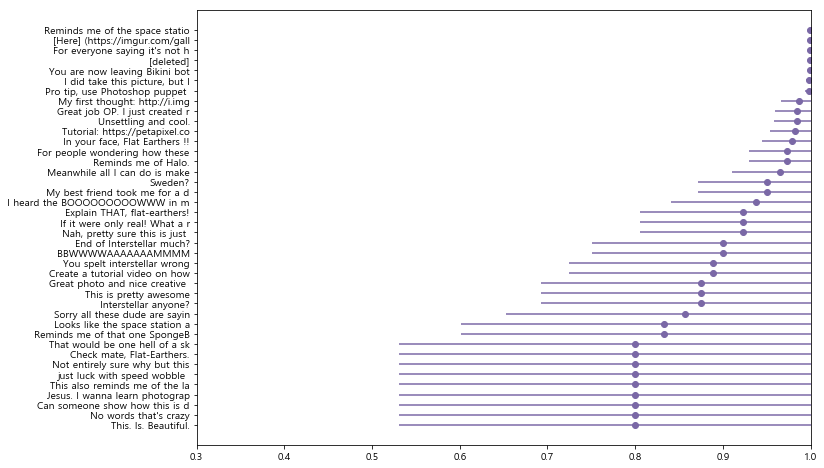

In [13]:
r_order = order[::-1][-40:]
plt.errorbar(posterior_mean[r_order], np.arange(len(r_order)),
             xerr=std_err[r_order], capsize=0, fmt="o",
             color="#7A68A6")
plt.xlim(0.3, 1)
plt.yticks(np.arange(len(r_order) - 1, -1, -1), map(lambda x: x[:30].replace("\n", ""), ordered_contents));

In [14]:
# Enter code here
import scipy.stats as stats
exp = stats.expon(scale=4)
N = int(1e5)
X = exp.rvs(N)
# ...